In [ ]:
import mlrose_hiive
import numpy as np

In [156]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing, datasets
import pandas as pd
import time
import random
import warnings

# Initialization

In [157]:
X = pd.read_csv('data/features.csv')
X = X.iloc[:,1:].values
X = X.astype(float)

y = pd.read_csv("data/target.csv")
y = y[["Is Disadvantaged Community?"]].values
y = y.astype(int)

print("Number of samples:", y.size)
print("Percentage of disadvantaged communities cases:", round(y[y == 1].size/y.size*100,2),"%")

print("Number of samples:", y.size)
print("Percentage of malignant cases:", y[y == 1].size/y.size*100)

print("Splitting into train/test sets...")
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

learning_rates = [ 0.01, 0.1, 1]
#activations = ['relu', 'sigmoid', 'tanh']
restarts = [2, 4, 6, 8, 10]
schedules = [mlrose_hiive.GeomDecay(), mlrose_hiive.ExpDecay(), mlrose_hiive.ArithDecay()]
populations = [10, 20, 30, 50]
mutation_probs = [0.01,0.1,0.2]

train_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc_best = 0.0
rhc_best_idx1 = 0
rhc_best_idx2 = 0
test_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
time_rhc = np.zeros((len(learning_rates),len(restarts)))

train_acc_sa = np.zeros((len(learning_rates),len(schedules)))
val_acc_sa = np.zeros((len(learning_rates),len(schedules)))
val_acc_sa_best = 0.0
sa_best_idx1 = 0
sa_best_idx2 = 0
test_acc_sa = np.zeros((len(learning_rates),len(schedules)))
time_sa = np.zeros((len(learning_rates),len(schedules)))

train_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs))) #######
val_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs))) ######
val_acc_ga_best = 0.0
ga_best_idx1 = 0
ga_best_idx2 = 0
ga_best_idx3 = 0
test_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs)))
time_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs)))

train_acc_backprop = np.zeros((len(learning_rates),1))
val_acc_backprop = np.zeros((len(learning_rates),1))
val_acc_backprop_best = 0.0
backprop_best_idx1 = 0
backprop_best_idx2 = 0
test_acc_backprop = np.zeros((len(learning_rates),1))
time_backprop = np.zeros((len(learning_rates),1))


Number of samples: 1698
Percentage of disadvantaged communities cases: 25.74 %
Number of samples: 1698
Percentage of malignant cases: 25.736160188457006
Splitting into train/test sets...


# Algos

## RHC

Learning Rate: 0.01
Restarts: 2
Time: 27.983550786972046
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Learning Rate: 0.1
Restarts: 2
Time: 29.959789752960205
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Learning Rate: 1
Restarts: 2
Time: 9.19352650642395
Iteration done!
Iteration done!
Iteration done!
Learning Rate: 1
Restarts: 8
Time: 33.15182065963745
Iteration done!
Iteration done!


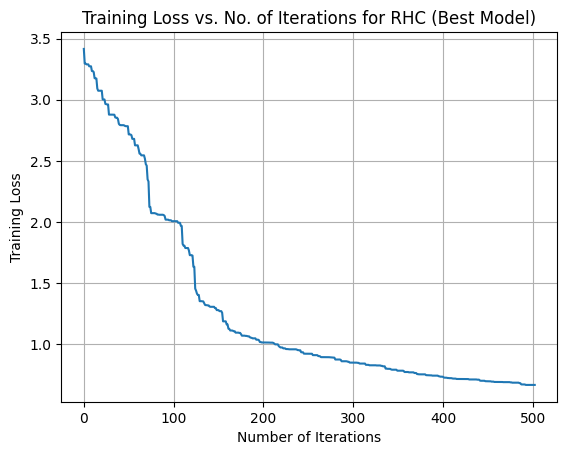

Average Time 50.01296051343282
Time: [[27.98355079 42.82474852 63.4586792  86.17461085 98.27689147]
 [29.95978975 45.32445741 62.4089942  82.35567498 92.81654048]
 [ 9.19352651 17.11679482 23.43900561 33.15182066 35.70932245]]
Test Accuracy: 0.8147058823529412
Confusion Matrix: [[229  26]
 [ 37  48]]
RHC Completed!
RHC saved


In [158]:
nn_model_rhc_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.1, early_stopping = True, 
		                         	max_attempts = 10, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2, restart in enumerate(restarts):
		nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 1000, bias = True, restarts = restart, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 10, random_state = 42, curve = True)

		start = time.time()
		nn_model_rhc.fit(X_train, y_train)
		end = time.time()
		time_rhc_current = end - start

		y_train_pred_rhc = nn_model_rhc.predict(X_train)
		y_train_accuracy_rhc = accuracy_score(y_train, y_train_pred_rhc)
		train_acc_rhc[idx1][idx2] = y_train_accuracy_rhc

		y_val_pred_rhc = nn_model_rhc.predict(X_val)
		y_val_accuracy_rhc = accuracy_score(y_val, y_val_pred_rhc)
		val_acc_rhc[idx1][idx2]= y_val_accuracy_rhc

		y_test_pred_rhc = nn_model_rhc.predict(X_test)
		y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
		test_acc_rhc[idx1][idx2] = y_test_accuracy_rhc
		time_rhc[idx1][idx2]= time_rhc_current

		if y_val_accuracy_rhc > val_acc_rhc_best:
			nn_model_rhc_best = nn_model_rhc
			print("Learning Rate:", learning_rate)
			print("Restarts:", restart)
			print("Time:", time_rhc_current)
			rhc_best_idx1 = idx1
			rhc_best_idx2 = idx2
			val_acc_rhc_best = y_val_accuracy_rhc

		print("Iteration done!")

plt.figure()
plt.plot(nn_model_rhc_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for RHC (Best Model)')
plt.savefig('nn_train_iterations_curve_rhc_best.png')
plt.show()

y_test_pred_rhc = nn_model_rhc_best.predict(X_test)
confusion_matrix_rhc = confusion_matrix(y_test, y_test_pred_rhc)

print("Average Time", np.mean(time_rhc))
print("Time:", time_rhc)
print("Test Accuracy:", test_acc_rhc[rhc_best_idx1][rhc_best_idx2])
print("Confusion Matrix:", confusion_matrix_rhc)

print('RHC Completed!')

np.savez('rhc_results.npz', train_acc = train_acc_rhc, val_acc=val_acc_rhc, test_acc=test_acc_rhc, time=time_rhc)
np.savez('rhc_results_best_idx.npz', val_acc_rhc_best=val_acc_rhc_best, rhc_best_idx1=rhc_best_idx1, rhc_best_idx2=rhc_best_idx2,)
print("RHC saved")

In [159]:
data = np.load('rhc_results.npz')
train_acc_ga = data['train_acc']
val_acc_ga = data['val_acc']
test_acc_ga = data['test_acc']
time_ga = data['time']

In [160]:
data = np.load('rhc_results_best_idx.npz')
val_acc_rhc_best = data['val_acc_rhc_best']
rhc_best_idx1 = data['rhc_best_idx1']
rhc_best_idx2 = data['rhc_best_idx2']

## SA

Learning Rate: 0.01
Schedule: 0
Time: 12.764442920684814
Iteration done!
Iteration done!
Iteration done!
Learning Rate: 0.1
Schedule: 0
Time: 13.01248288154602
Iteration done!
Iteration done!
Iteration done!
Learning Rate: 1
Schedule: 0
Time: 18.562436819076538
Iteration done!
Iteration done!
Iteration done!


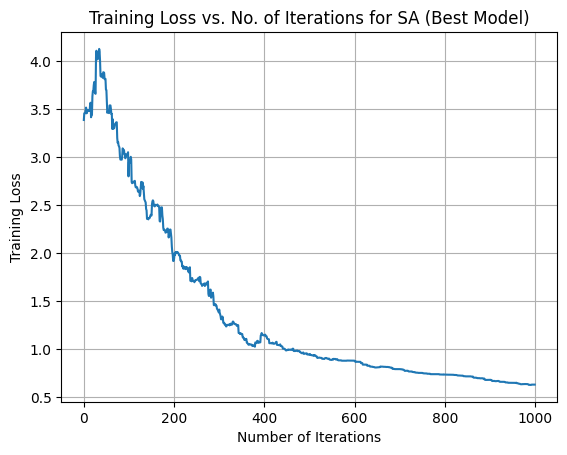

Average Time 15.179327699873182
Time: [[12.76444292 13.52244163 14.31850719]
 [13.01248288 13.07456255 25.3300395 ]
 [18.56243682 13.0112226  13.01781321]]
Test Accuracy: 0.7941176470588235
Confusion Matrix: [[226  29]
 [ 41  44]]
SA Completed!
SA saved


In [161]:
nn_model_sa_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.1, early_stopping = True, 
		                         	max_attempts = 10, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2, schedule in enumerate(schedules):
		nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 1000, bias = True, schedule = schedule, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 10, random_state = 42, curve = True)

		start = time.time()
		nn_model_sa.fit(X_train, y_train)
		end = time.time()
		time_sa_current = end - start

		y_train_pred_sa = nn_model_sa.predict(X_train)
		y_train_accuracy_sa = accuracy_score(y_train, y_train_pred_sa)
		train_acc_sa[idx1][idx2] = y_train_accuracy_sa

		y_val_pred_sa = nn_model_sa.predict(X_val)
		y_val_accuracy_sa = accuracy_score(y_val, y_val_pred_sa)
		val_acc_sa[idx1][idx2]= y_val_accuracy_sa

		y_test_pred_sa = nn_model_sa.predict(X_test)
		y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
		test_acc_sa[idx1][idx2] = y_test_accuracy_sa
		time_sa[idx1][idx2]= time_sa_current

		if y_val_accuracy_sa > val_acc_sa_best:
			nn_model_sa_best = nn_model_sa
			print("Learning Rate:", learning_rate)
			print("Schedule:", idx2)
			print("Time:", time_sa_current)
			sa_best_idx1 = idx1
			sa_best_idx2 = idx2
			val_acc_sa_best = y_val_accuracy_sa

		print("Iteration done!")

plt.figure()
plt.plot(nn_model_sa_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for SA (Best Model)')
plt.savefig('nn_train_iterations_curve_sa_best.png')
plt.show()

y_test_pred_sa = nn_model_sa_best.predict(X_test)
confusion_matrix_sa = confusion_matrix(y_test, y_test_pred_sa)

print("Average Time", np.mean(time_sa))
print("Time:", time_sa)
print("Test Accuracy:", test_acc_sa[sa_best_idx1][sa_best_idx2])
print("Confusion Matrix:", confusion_matrix_sa)

print('SA Completed!')

np.savez('sa_results.npz', train_acc = train_acc_sa, val_acc=val_acc_sa, test_acc=test_acc_sa, time=time_sa)
np.savez('sa_results_best_idx.npz', val_acc_sa_best=val_acc_sa_best, sa_best_idx1=sa_best_idx1, sa_best_idx2=sa_best_idx2)
print("SA saved")

In [162]:
data = np.load('sa_results.npz')
train_acc_ga = data['train_acc']
val_acc_ga = data['val_acc']
test_acc_ga = data['test_acc']
time_ga = data['time']

In [163]:
data = np.load('sa_results_best_idx.npz')
val_acc_sa_best = data['val_acc_sa_best']
sa_best_idx1 = data['sa_best_idx1']
sa_best_idx2 = data['sa_best_idx2']

## SGD

Learning Rate: 0.01
Time: 16.84996795654297
Iteration done!
Iteration done!
Iteration done!


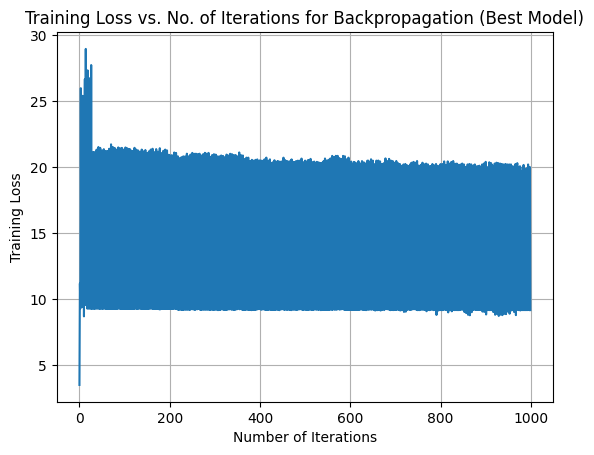

Average Time 17.63645013173421
Time: [[16.84996796]
 [18.87869406]
 [17.18068838]]
Test Accuracy: 0.55
Confusion Matrix: [[167  88]
 [ 65  20]]
Backprop Completed!
Backprop saved


In [164]:
nn_model_backprop_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.1, early_stopping = True, 
		                         	max_attempts = 10, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2 in range(1):
		nn_model_backprop = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True,
		                         	max_attempts = 10, random_state = 42, curve = True)

		start = time.time()
		nn_model_backprop.fit(X_train, y_train)
		end = time.time()
		time_backprop_current = end - start

		y_train_pred_backprop = nn_model_backprop.predict(X_train)
		y_train_accuracy_backprop = accuracy_score(y_train, y_train_pred_backprop)
		train_acc_backprop[idx1][idx2] = y_train_accuracy_backprop

		y_val_pred_backprop = nn_model_backprop.predict(X_val)
		y_val_accuracy_backprop = accuracy_score(y_val, y_val_pred_backprop)
		val_acc_backprop[idx1][idx2]= y_val_accuracy_backprop

		y_test_pred_backprop = nn_model_backprop.predict(X_test)
		y_test_accuracy_backprop = accuracy_score(y_test, y_test_pred_backprop)
		test_acc_backprop[idx1][idx2] = y_test_accuracy_backprop
		time_backprop[idx1][idx2]= time_backprop_current

		if y_val_accuracy_backprop > val_acc_backprop_best:
			nn_model_backprop_best = nn_model_backprop
			print("Learning Rate:", learning_rate)
			print("Time:", time_backprop_current)
			backprop_best_idx1 = idx1
			backprop_best_idx2 = idx2
			val_acc_backprop_best = y_val_accuracy_backprop

		print("Iteration done!")

plt.figure()
plt.plot(-nn_model_backprop_best.fitness_curve)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for Backpropagation (Best Model)')
plt.savefig('nn_train_iterations_curve_backprop_best.png')
plt.show()

y_test_pred_backprop = nn_model_backprop_best.predict(X_test)
confusion_matrix_backprop = confusion_matrix(y_test, y_test_pred_backprop)

print("Average Time", np.mean(time_backprop))
print("Time:", time_backprop)
print("Test Accuracy:", test_acc_backprop[backprop_best_idx1][backprop_best_idx2])
print("Confusion Matrix:", confusion_matrix_backprop)

print('Backprop Completed!')

np.savez('backprop_results.npz', train_acc = train_acc_backprop, val_acc=val_acc_backprop, test_acc=test_acc_backprop, time=time_backprop)
np.savez('backprop_results_best_idx.npz', val_acc_backprop_best=val_acc_backprop_best, backprop_best_idx1=backprop_best_idx1, backprop_best_idx2=backprop_best_idx2)

print("Backprop saved")

In [165]:
data = np.load('backprop_results.npz')
train_acc_ga = data['train_acc']
val_acc_ga = data['val_acc']
test_acc_ga = data['test_acc']
time_ga = data['time']

In [166]:
data = np.load('backprop_results_best_idx.npz')
val_acc_backprop_best = data['val_acc_backprop_best']
backprop_best_idx1 = data['backprop_best_idx1']
backprop_best_idx2 = data['backprop_best_idx2']

## GA

In [167]:
train_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs))) #######
val_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs))) ######
val_acc_ga_best = 0.0
ga_best_idx1 = 0
ga_best_idx2 = 0
ga_best_idx3 = 0
test_acc_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs)))
time_ga = np.zeros((len(learning_rates),len(populations), len(mutation_probs)))

Learning Rate: 0.01
Population: 10
Mutation Prob: 0.01
Time: 3.388885021209717
Iteration done!
Learning Rate: 0.01
Population: 10
Mutation Prob: 0.1
Time: 5.104419708251953
Iteration done!
Iteration done!
Learning Rate: 0.01
Population: 20
Mutation Prob: 0.01
Time: 9.883672714233398
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!
Iteration done!


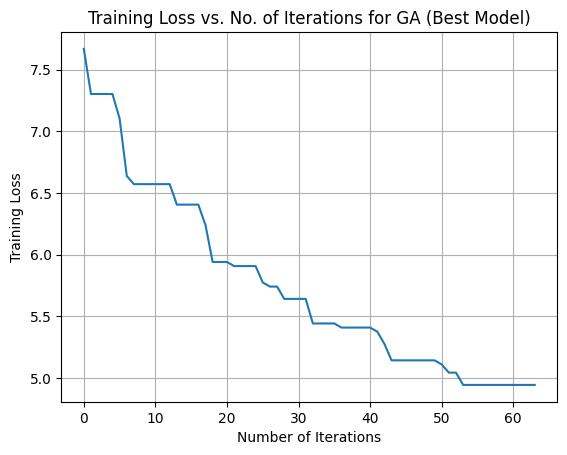

Average Time 9.614391903082529
Time: [[[ 3.38888502  5.10441971  3.06038618]
  [ 9.88367271  6.60913467  7.58079696]
  [11.58218288  9.55202246  4.57662058]
  [24.90628266 21.21187806  5.14069653]]

 [[ 3.29197669  5.0102005   2.75375175]
  [ 9.20304418  7.36364222  8.17549467]
  [11.49489093  8.05814004  4.7820003 ]
  [33.9592452  22.09864902  5.61891079]]

 [[ 3.27410674  4.85882568  2.73634005]
  [ 9.52091026  6.42344403  7.92951941]
  [11.05752349  7.84185576  4.9378593 ]
  [24.71889448 22.79026675  5.62163782]]]
Test Accuracy: 0.8411764705882353
Confusion Matrix: [[233  22]
 [ 32  53]]
GA saved


In [168]:
nn_model_ga_best = mlrose_hiive.NeuralNetwork(hidden_nodes=[150], activation='relu', 
		                                   algorithm='genetic_alg', 
		                                   max_iters=500, bias=True, is_classifier=True, 
		                                   learning_rate=0.1, early_stopping=True, 
		                                   max_attempts=10, random_state=42, curve=True)

for idx1, learning_rate in enumerate(learning_rates):
    for idx2, population in enumerate(populations):
        for idx3, mut_prob in enumerate(mutation_probs):
            nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[150], activation='relu', 
		                                      algorithm='genetic_alg', 
		                                      max_iters=500, bias=True, pop_size=population, mutation_prob=mut_prob, is_classifier=True, 
		                                      learning_rate=learning_rate, early_stopping=True, 
		                                      max_attempts=10, random_state=42, curve=True)
            
            start = time.time()
            nn_model_ga.fit(X_train, y_train)
            end = time.time()
            time_ga_current = end - start
            
            y_train_pred_ga = nn_model_ga.predict(X_train)
            y_train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
            train_acc_ga[idx1][idx2][idx3] = y_train_accuracy_ga
            
            y_val_pred_ga = nn_model_ga.predict(X_val)
            y_val_accuracy_ga = accuracy_score(y_val, y_val_pred_ga)
            val_acc_ga[idx1][idx2][idx3] = y_val_accuracy_ga
            
            y_test_pred_ga = nn_model_ga.predict(X_test)
            y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
            test_acc_ga[idx1][idx2][idx3] = y_test_accuracy_ga
            time_ga[idx1][idx2][idx3] = time_ga_current
            
            if y_val_accuracy_ga > val_acc_ga_best:
                nn_model_ga_best = nn_model_ga
                print("Learning Rate:", learning_rate)
                print("Population:", population)
                print("Mutation Prob:", mut_prob)
                print("Time:", time_ga_current)
                ga_best_idx1 = idx1
                ga_best_idx2 = idx2
                ga_best_idx3 = idx3
                val_acc_ga_best = y_val_accuracy_ga
                        
            print("Iteration done!")

plt.figure()
plt.plot(nn_model_ga_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for GA (Best Model)')
plt.savefig('nn_train_iterations_curve_ga_best.png')
plt.show()

y_test_pred_ga = nn_model_ga_best.predict(X_test)
confusion_matrix_ga = confusion_matrix(y_test, y_test_pred_ga)

print("Average Time", np.mean(time_ga))
print("Time:", time_ga)
print("Test Accuracy:", test_acc_ga[ga_best_idx1][ga_best_idx2][ga_best_idx3])
print("Confusion Matrix:", confusion_matrix_ga)

np.savez('ga_results.npz', train_acc=train_acc_ga, val_acc=val_acc_ga, test_acc=test_acc_ga, time=time_ga)
# Save the variables with 'ga' instead of 'rhc' in the filename
np.savez('ga_results_best_idx.npz', val_acc_ga_best=val_acc_ga_best, ga_best_idx1=ga_best_idx1, ga_best_idx2=ga_best_idx2, ga_best_idx3=ga_best_idx3)
print("GA saved")

In [169]:
data = np.load('ga_results.npz')
train_acc_ga = data['train_acc']
val_acc_ga = data['val_acc']
test_acc_ga = data['test_acc']
time_ga = data['time']

In [170]:
data = np.load('ga_results_best_idx.npz')
val_acc_ga_best = data['val_acc_ga_best']
ga_best_idx1 = data['ga_best_idx1']
ga_best_idx2 = data['ga_best_idx2']
ga_best_idx3 = data['ga_best_idx3']

# load trained output

# plots

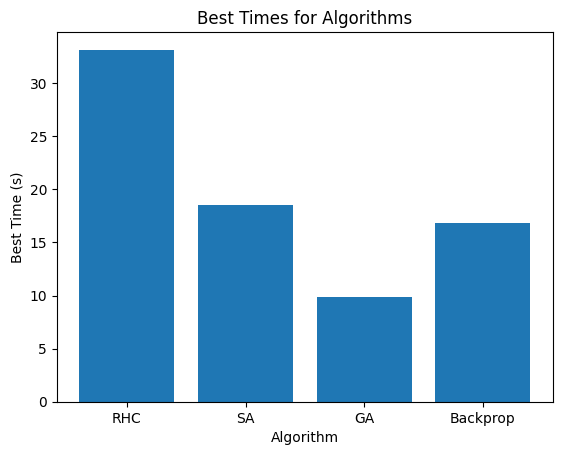

In [171]:
plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [time_rhc[rhc_best_idx1][rhc_best_idx2], time_sa[sa_best_idx1][sa_best_idx2], time_ga[ga_best_idx1][ga_best_idx2][ga_best_idx3], time_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Time (s)")
plt.title('Best Times for Algorithms')
plt.savefig('nn_best_times.png')
plt.show()

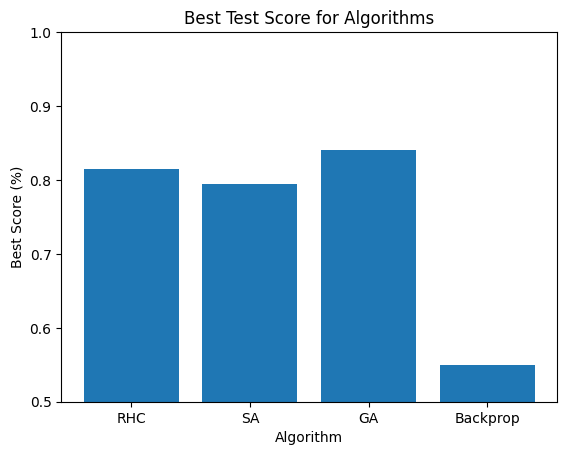

In [172]:
plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [test_acc_rhc[rhc_best_idx1][rhc_best_idx2], test_acc_sa[sa_best_idx1][sa_best_idx2], test_acc_ga[ga_best_idx1][ga_best_idx2][ga_best_idx3], test_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Test Score for Algorithms')
plt.ylim((0.5,1.0))
plt.savefig('nn_best_test_scores.png')
plt.show()

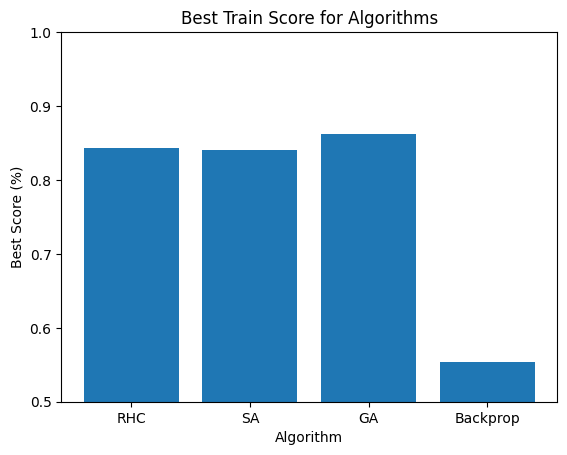

In [173]:
plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [train_acc_rhc[rhc_best_idx1][rhc_best_idx2], train_acc_sa[sa_best_idx1][sa_best_idx2], train_acc_ga[ga_best_idx1][ga_best_idx2][ga_best_idx3], train_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Train Score for Algorithms')
plt.ylim((0.5,1.0))
plt.savefig('nn_best_train_scores.png')
plt.show()

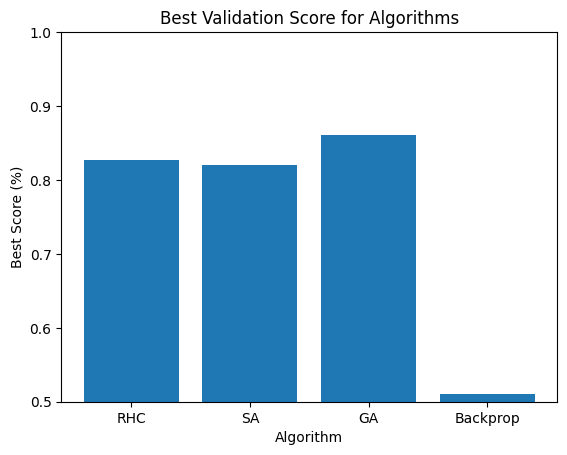

In [174]:
plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [val_acc_rhc[rhc_best_idx1][rhc_best_idx2], val_acc_sa[sa_best_idx1][sa_best_idx2], val_acc_ga[ga_best_idx1][ga_best_idx2][ga_best_idx3], val_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Validation Score for Algorithms')
plt.ylim((0.5,1.0))
plt.savefig('nn_best_val_scores.png')
plt.show()

In [184]:
time_ga[:,:,0].shape

(3, 4)

In [194]:
time_ga[:,:,2]

array([[3.06038618, 7.58079696, 4.57662058, 5.14069653],
       [2.75375175, 8.17549467, 4.7820003 , 5.61891079],
       [2.73634005, 7.92951941, 4.9378593 , 5.62163782]])

In [193]:
 np.mean( time_ga[:,:,2], axis=1)

array([5.08962506, 5.33253938, 5.30633914])

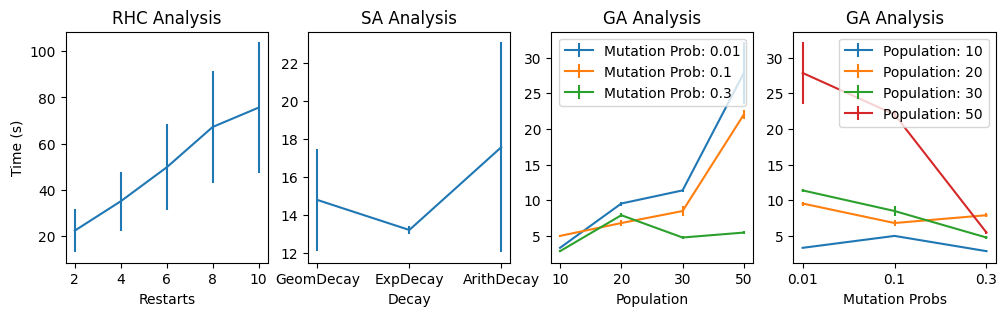

In [199]:
plt.figure(figsize = (12,3))
plt.tight_layout()
plt.subplot(141)
plt.xlabel("Restarts")
plt.ylabel("Time (s)")
plt.title("RHC Analysis")
plt.errorbar(x = ['2', '4', '6', '8', '10'], y = np.mean(time_rhc, axis = 0), yerr = np.std(time_rhc, axis = 0))
plt.subplot(142)
plt.xlabel("Decay")
plt.title("SA Analysis")
plt.errorbar(['GeomDecay', 'ExpDecay', 'ArithDecay'], np.mean(time_sa, axis = 0), yerr = np.std(time_sa, axis = 0))
plt.subplot(143)
plt.xlabel("Population")
plt.title("GA Analysis")
plt.errorbar(['10', '20', '30', '50'], np.mean(time_ga[:,:,0], axis=0), yerr=np.std(time_ga[:,:,0], axis=0), label='Mutation Prob: 0.01')
plt.errorbar(['10', '20', '30', '50'], np.mean(time_ga[:,:,1], axis=0), yerr=np.std(time_ga[:,:,1], axis=0), label='Mutation Prob: 0.1')
plt.errorbar(['10', '20', '30', '50'], np.mean(time_ga[:,:,2], axis=0), yerr=np.std(time_ga[:,:,2], axis=0), label='Mutation Prob: 0.3')
plt.legend()
plt.subplot(144)
plt.xlabel("Mutation Probs")
plt.title("GA Analysis")
plt.errorbar(['0.01', '0.1', '0.3'], np.mean(time_ga[:,0,:], axis=0), yerr=np.std(time_ga[:,0,:], axis=0), label='Population: 10')
plt.errorbar(['0.01', '0.1', '0.3'], np.mean(time_ga[:,1,:], axis=0), yerr=np.std(time_ga[:,1,:], axis=0), label='Population: 20')
plt.errorbar(['0.01', '0.1', '0.3'], np.mean(time_ga[:,2,:], axis=0), yerr=np.std(time_ga[:,2,:], axis=0), label='Population: 30')
plt.errorbar(['0.01', '0.1', '0.3'], np.mean(time_ga[:,3,:], axis=0), yerr=np.std(time_ga[:,3,:], axis=0), label='Population: 50')
plt.legend()
plt.savefig('nn_times_with_error_bars.png')
plt.show()

## lear

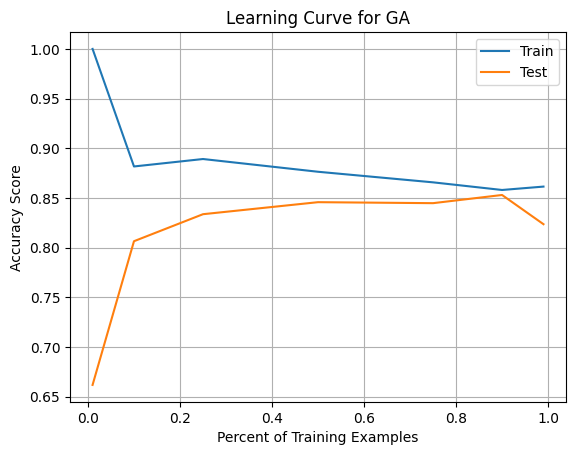

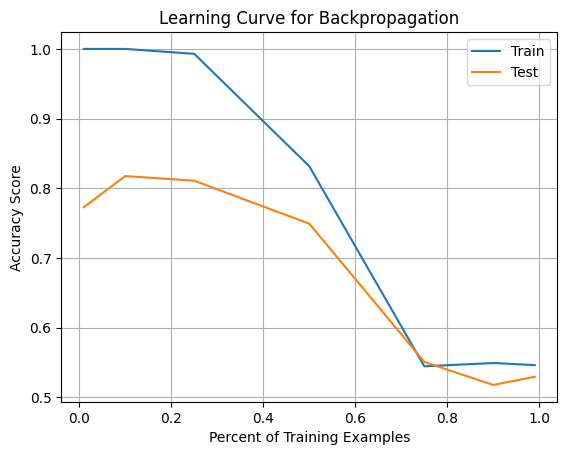

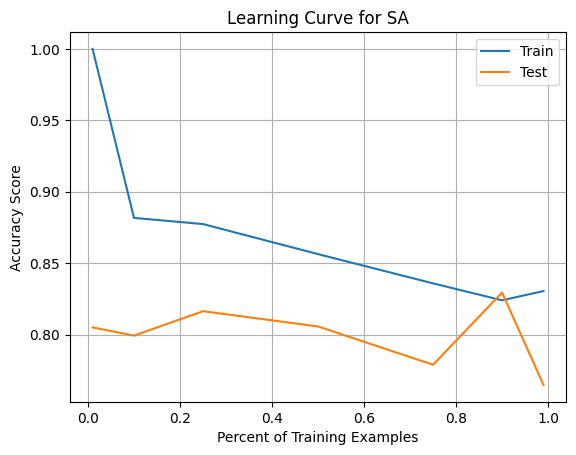

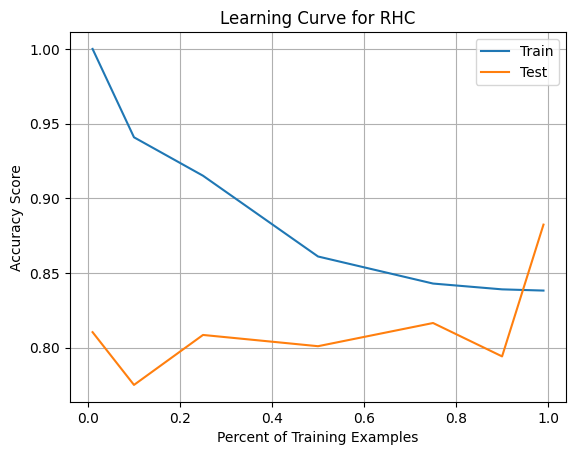

In [176]:
test_sizes = [0.99, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01]
train_acc_ga_lrc = []
test_acc_ga_lrc = []
train_acc_backprop_lrc = []
test_acc_backprop_lrc = []
train_acc_sa_lrc = []
test_acc_sa_lrc = []
train_acc_rhc_lrc = []
test_acc_rhc_lrc = []

for test_size in test_sizes:
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
	nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='genetic_alg', 
		                         	max_iters = 500, bias = True, pop_size = populations[ga_best_idx2], mutation_prob= mutation_probs[ga_best_idx3] ,is_classifier = True, 
		                         	learning_rate = learning_rates[ga_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_backprop = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = learning_rates[backprop_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 1000, bias = True, schedule = schedules[sa_best_idx2], is_classifier = True, 
		                         	learning_rate = learning_rates[sa_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [150], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 1000, bias = True, restarts = restarts[rhc_best_idx2], is_classifier = True, 
		                         	learning_rate = learning_rates[rhc_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	
	nn_model_ga.fit(X_train, y_train)

	y_train_pred_ga = nn_model_ga.predict(X_train)
	y_train_accuracy_ga = accuracy_score(y_train, y_train_pred_ga)
	train_acc_ga_lrc.append(y_train_accuracy_ga)

	y_test_pred_ga = nn_model_ga.predict(X_test)
	y_test_accuracy_ga = accuracy_score(y_test, y_test_pred_ga)
	test_acc_ga_lrc.append(y_test_accuracy_ga)

	nn_model_backprop.fit(X_train, y_train)

	y_train_pred_backprop = nn_model_backprop.predict(X_train)
	y_train_accuracy_backprop = accuracy_score(y_train, y_train_pred_backprop)
	train_acc_backprop_lrc.append(y_train_accuracy_backprop)

	y_test_pred_backprop = nn_model_backprop.predict(X_test)
	y_test_accuracy_backprop = accuracy_score(y_test, y_test_pred_backprop)
	test_acc_backprop_lrc.append(y_test_accuracy_backprop)

	nn_model_rhc.fit(X_train, y_train)

	y_train_pred_rhc = nn_model_rhc.predict(X_train)
	y_train_accuracy_rhc = accuracy_score(y_train, y_train_pred_rhc)
	train_acc_rhc_lrc.append(y_train_accuracy_rhc)

	y_test_pred_rhc = nn_model_rhc.predict(X_test)
	y_test_accuracy_rhc = accuracy_score(y_test, y_test_pred_rhc)
	test_acc_rhc_lrc.append(y_test_accuracy_rhc)

	nn_model_sa.fit(X_train, y_train)

	y_train_pred_sa = nn_model_sa.predict(X_train)
	y_train_accuracy_sa = accuracy_score(y_train, y_train_pred_sa)
	train_acc_sa_lrc.append(y_train_accuracy_sa)

	y_test_pred_sa = nn_model_sa.predict(X_test)
	y_test_accuracy_sa = accuracy_score(y_test, y_test_pred_sa)
	test_acc_sa_lrc.append(y_test_accuracy_sa)

train_sizes = [1 - test_size for test_size in test_sizes]

plt.figure()
plt.plot(train_sizes, train_acc_ga_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_ga_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for GA')
plt.savefig('nn_learning_curve_ga.png')

plt.figure()
plt.plot(train_sizes, train_acc_backprop_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_backprop_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Backpropagation')
plt.savefig('nn_learning_curve_backprop.png')

plt.figure()
plt.plot(train_sizes, train_acc_sa_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_sa_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for SA')
plt.savefig('nn_learning_curve_sa.png')

plt.figure()
plt.plot(train_sizes, train_acc_rhc_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_rhc_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for RHC')
plt.savefig('nn_learning_curve_rhc.png')

## validation curves

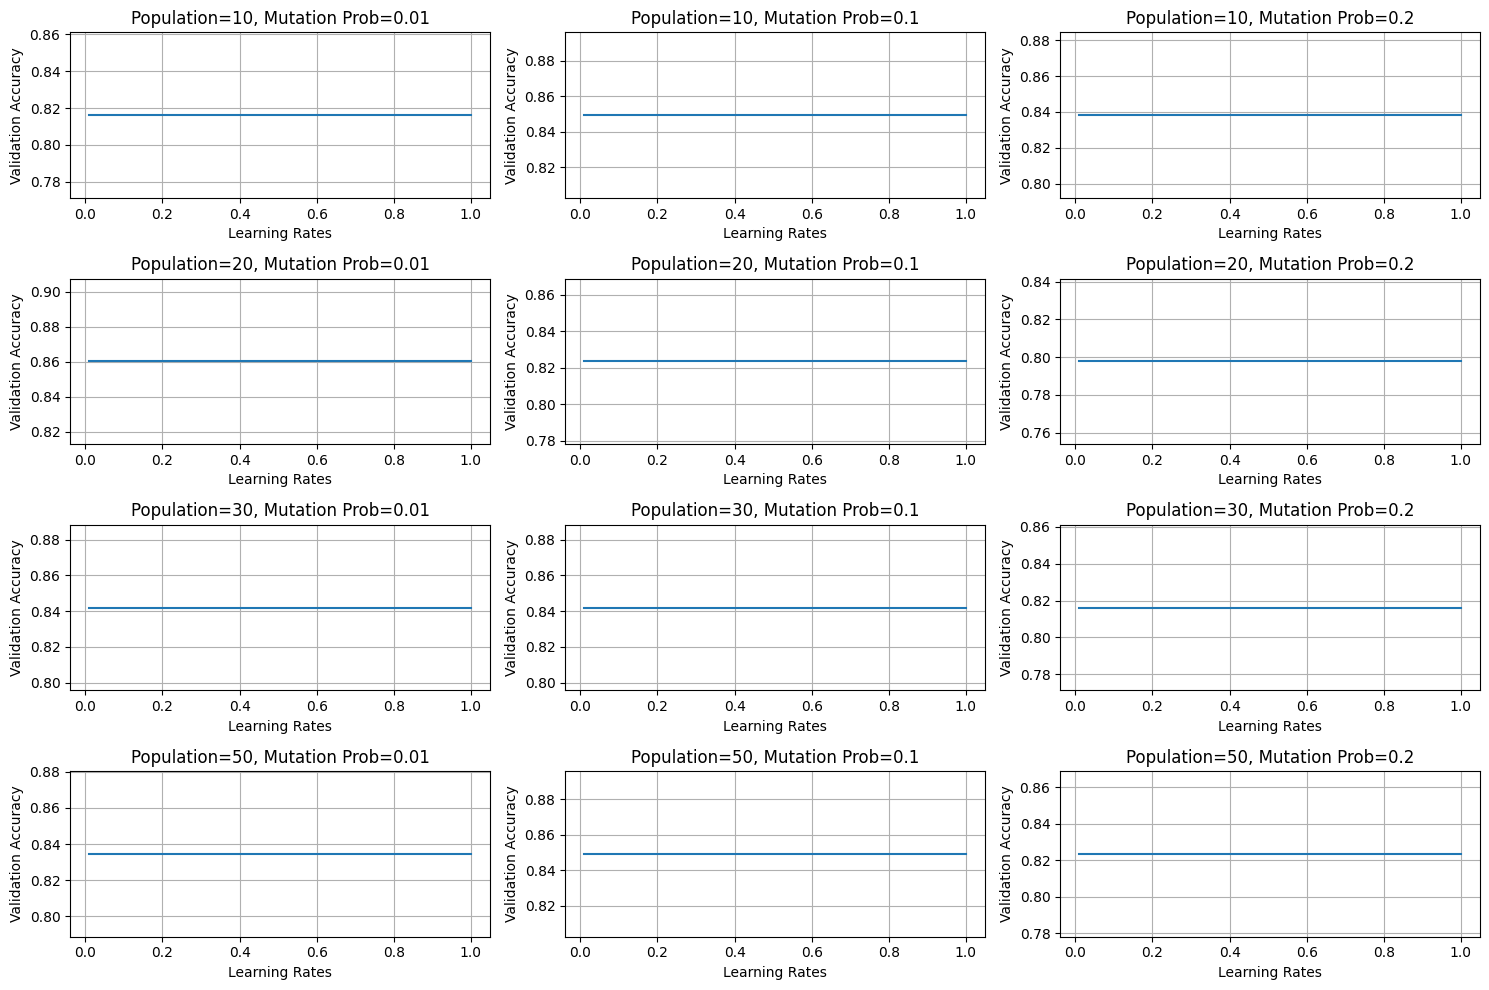

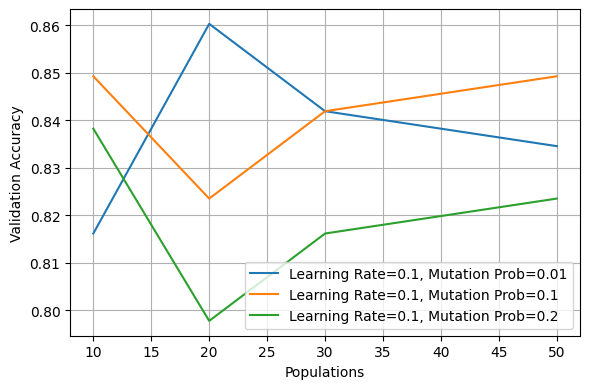

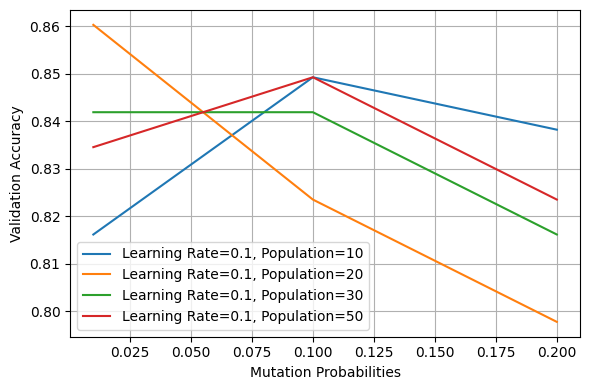

In [213]:
# Plotting validation curves for learning rates
fig, axes = plt.subplots(len(populations), len(mutation_probs), figsize=(15, 10))
for i in range(len(populations)):
    for j in range(len(mutation_probs)):
        ax = axes[i, j]
        ax.plot(learning_rates, val_acc_ga[:, i, j])
        ax.set_title(f"Population={populations[i]}, Mutation Prob={mutation_probs[j]}")
        ax.set_xlabel('Learning Rates')
        ax.set_ylabel('Validation Accuracy')
        ax.grid(True)

plt.tight_layout()
plt.savefig('nn_val_curve_GA_LR.png')
plt.show()

# Plotting validation curves for populations
# fig, axes = plt.subplots(len(learning_rates), len(mutation_probs), figsize=(15, 10))
# fig, axes = plt.subplots(111, figsize=(12, 8))
# # ax = axes[i, j]
plt.figure(figsize=(6, 4))
for j in range(len(mutation_probs)):
    plt.plot(populations, val_acc_ga[1, :, j], label = f"Learning Rate={learning_rates[1]}, Mutation Prob={mutation_probs[j]}")
   
plt.xlabel('Populations')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('nn_val_curve_GA_pop_size.png')
plt.show()

# Plotting validation curves for mutation probabilities
# fig, axes = plt.subplots(len(learning_rates), len(populations), figsize=(15, 10))
plt.figure(figsize=(6, 4))
# ax = axes[i, j]
for j in range(len(populations)):
    plt.plot(mutation_probs, val_acc_ga[1, j, :], label= f"Learning Rate={learning_rates[1]}, Population={populations[j]}")
plt.xlabel('Mutation Probabilities')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.tight_layout()
plt.savefig('nn_val_curve_GA_mutation.png')
plt.show()

# conclusion
| Comparison             | RHC                                                                                                         | SA                                                                                                              | GA                                                                                                                          | Backpropagation                                                                                                             |
|----------------------|-------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| Exploration vs. Exploitation | RHC typically focuses more on local search, which might lead to faster convergence but could get trapped in local optima. | SA introduces a temperature parameter that controls the balance between exploration and exploitation.        | GA uses a population-based approach, allowing for more diverse exploration of the solution space through crossover and mutation operations. | Backpropagation updates weights based on gradients computed using backpropagation, balancing between exploring different paths and exploiting gradients for convergence. |
| Convergence Speed    | RHC may converge quickly but might get stuck in local optima.                                                  | SA often has a slower convergence rate but can escape local optima by accepting worse solutions with a certain probability. | GA typically requires more iterations to converge due to its population-based nature and the need to explore and exploit diverse solutions. | Backpropagation often exhibits a gradual decrease in loss as it updates weights based on gradients, contributing to convergence. |
| Parameter Sensitivity | RHC doesn't have many parameters to tune, but initial conditions can affect its performance.                 | SA requires tuning the initial temperature and cooling schedule.                                             | GA requires tuning parameters such as population size and mutation rate.                                                       | Backpropagation requires tuning parameters like learning rate and regularization strength to balance convergence speed and stability. |
| Problem Complexity   | RHC may struggle with complex problems and high-dimensional spaces.                                          | SA can handle complex problems but might need careful tuning.                                                  | GA is versatile but may not be efficient for highly complex problems.                                                       | Backpropagation is commonly used for training neural networks on complex problems with high-dimensional input spaces.      |
| Training Size        | RHC may not be affected significantly by training size as it primarily focuses on local search.              | SA performance may improve with larger training sizes due to better exploration of the solution space.         | GA often benefits from larger training sizes as it enhances diversity in the population and improves convergence.            | Backpropagation typically requires large training sizes to effectively learn complex patterns in data and avoid overfitting.  |
| Computational Time   | RHC tends to have lower computational time compared to other algorithms due to its local search nature.     | SA computational time can vary depending on the cooling schedule and the acceptance probability threshold.     | GA computational time increases with the population size and the complexity of the problem.                                 | Backpropagation computational time can be high, especially for deep neural networks and large datasets, due to iterative gradient calculations and weight updates. |
| Robustness           | RHC may lack robustness as it's prone to getting stuck in local optima.                                      | SA exhibits robustness against local optima due to its probabilistic acceptance of worse solutions.           | GA can be robust due to its population-based approach, which allows for diversity and exploration of multiple solutions.  | Backpropagation can be robust against noise in data but may suffer from overfitting if not regularized properly.            |    |